# Enoncé

Vous avez participé à une compétition sur Kaggle sur le jeu de données de Titanic (celle-ci existe, les curieux peuvent la retrouver sur Kaggle !). Vous avez pour cela à votre disposition [une liste de 891 passagers](https://www.kaggle.com/c/titanic), contenant les caractéristiques suivantes :


- PassengerID : Identifiant du passager
- Survived : Indicateur de survi d'un passager (1 si le passager a survecu, 0 s’il est décédé)
- Pclass: Classe du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe)
- Name : Nom et titre du passager
- Sex : Sexe du passager
- Age : Age du passager (Décimal si inférieur à 1, estimé si de la forme xx.5)
- SibSp : Nombre d’époux, de frères et de soeurs présents à bord
- Parch : Nombre de parents ou d’enfants présents à bord 
- Ticket : Numéro du ticket 
- Fare : Tarif des tickets (Le prix est indiqué en £ et pour un seul achat (peut correspondre à plusieurs tickets)
- Cabin : Numéro de Cabine
- Embarked : Port d’embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)
	 	

# Exercice

La compétition a été l’occasion de revenir sur ce jeu de données très célèbre, et plusieurs tâches étaient attendues, :
- identifier les facteurs favorisants la survie d'un passager par rapport à un autre, en dressant une typologie des survivants
- créer un algorithme qui pourrait prédire la survie d'un individu à partir de ces caractéristiques.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import statsmodels.formula.api as smf
from sklearn import decomposition , preprocessing
from scipy.stats import chi2_contingency 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Read csv files
gender = pd.read_csv('Data/gender_submission.csv', sep=',')
test = pd.read_csv('Data/test.csv', sep=',')
train = pd.read_csv('Data/train.csv', sep=',')

<span><h2 style="color: rgb(20, 110, 228);font-weight:bolder;"> Partie 1 : Nettoyage</h2></span>

In [80]:
gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [81]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [82]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [83]:
train.shape

(891, 12)

In [84]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [85]:
train.isna().sum()/ train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [86]:
df = train.copy()

<span style="color:#DD9938">Remplacement des données manquantes "cabin"  par non connue</span>

construire une variable pont 

In [87]:
#df['Cabin'].str[0].unique()

In [88]:
#df['Deck'] = df['Cabin'].str[0]

In [89]:
#df.loc[df['Deck'] == 'T','Deck'] = 'A'

In [90]:
#df.loc[df['Deck'].isnull(), 'Pclass'].value_counts()


In [91]:
#df.loc[df['Deck'].isnull() & (df['Pclass'].isin([2,3])) ]= 'N'

In [92]:
def get_closest(Fare, Embarked, prixDeck_df):
    prixDeck = prixDeck_df.loc[prixDeck_df['Embarked'] == Embarked,:]
    return prixDeck.loc[prixDeck['Fare'].sub(Fare).abs().idxmin(), 'Deck']

In [93]:
#df.loc[mask, 'Deck'] = df.loc[mask, :].apply(lambda x: get_closest(x['Fare'], x['Embarked'], prixDeck), axis=1)
#print(df['Deck'].isnull().sum())

In [94]:
#prixDeck = df.lock[df['Pclass']==1,['Deck,Embarked','Fare']]

In [95]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [96]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

<span style="color:#DD9938">Remplacement des données manquantes "Age" par la moyenne</span>

In [97]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


<span style="color:#DD9938">Ou remplacement  par la regression lineaire</span>

In [98]:
#Col Age et 
X = df.iloc[:,5].values
y = df.iloc[:,1].values

In [99]:
df.isna().sum()/ df.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
dtype: float64

<span style="color:#DD9938">Nous n'avons plus de Na , on peut passer à la vérification des types</span>

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


<span style="color:#DD9938"> Passage de la colonne Survived, Pclass, Sex 
</br> Création d'une colonne catégorie age
</span>

In [101]:
sex = df['Sex'].unique()
Pclass = df['Pclass'].unique()
Survived = df['Survived'].unique()

In [102]:
print('Unique pour',f" le sex : {sex}, la classe : {Pclass}, les survivants : {Survived}")

Unique pour  le sex : ['male' 'female'], la classe : [3 1 2], les survivants : [0 1]


In [103]:
df["Sex"] = df["Sex"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Survived"] = df["Survived"].astype("category")
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [104]:
def category_age(age):
    if age < 20:
        return '- 20 ans'
    elif age >= 20 and age <= 30:
        return '20 - 30 ans'
    elif age > 30 and age <= 40:
        return '30 - 40 ans'
    else:
        return '+ 40 ans' 

In [105]:
df['Categ_age'] = df['Age'].map(category_age).astype('category')

In [106]:
df.to_csv('Data/clean_train.csv', sep=',', index=False)

<span><h2 style="color: rgb(20, 110, 228);font-weight:bolder;"> Partie 2 : Analyse exploiratoire</h2></span>

In [107]:
df = pd.read_csv('Data/clean_train.csv', sep=',')

In [108]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Categ_age
0         0       3    0  22.0      1      0   7.2500  20 - 30 ans
1         1       1    1  38.0      1      0  71.2833  30 - 40 ans
2         1       3    1  26.0      0      0   7.9250  20 - 30 ans
3         1       1    1  35.0      1      0  53.1000  30 - 40 ans
4         0       3    0  35.0      0      0   8.0500  30 - 40 ans

In [109]:
df.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.002015    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   29.699118    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200

In [110]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [111]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
1    1  0.742038
0    0  0.188908

In [112]:
df.groupby(['Sex', 'Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex Pclass                                                     
0   1       0.368852  39.287717  0.311475  0.278689   67.226127
    2       0.157407  30.653908  0.342593  0.222222   19.741782
    3       0.135447  27.372153  0.498559  0.224784   12.661633
1   1       0.968085  34.141405  0.553191  0.457447  106.125798
    2       0.921053  28.748661  0.486842  0.605263   21.970121
    3       0.500000  24.068493  0.895833  0.798611   16.118810

In [113]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [114]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [115]:
df['Family'] = df['SibSp'] + df['Parch']

In [116]:
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

In [117]:
df['seul'] = 0
df.loc[df['Family'] == 0, 'seul'] = 1
df[['seul', 'Survived']].groupby(['seul'], as_index=False).mean()

seul  Survived
0     0  0.505650
1     1  0.303538

In [118]:
data = pd.crosstab(df["Family"],df["Survived"])

In [119]:
s= data.stack().reset_index().rename(columns={0:'value'})
s

Family  Survived  value
0        0         0    374
1        0         1    163
2        1         0     72
3        1         1     89
4        2         0     43
5        2         1     59
6        3         0      8
7        3         1     21
8        4         0     12
9        4         1      3
10       5         0     19
11       5         1      3
12       6         0      8
13       6         1      4
14       7         0      6
15       7         1      0
16      10         0      7
17      10         1      0

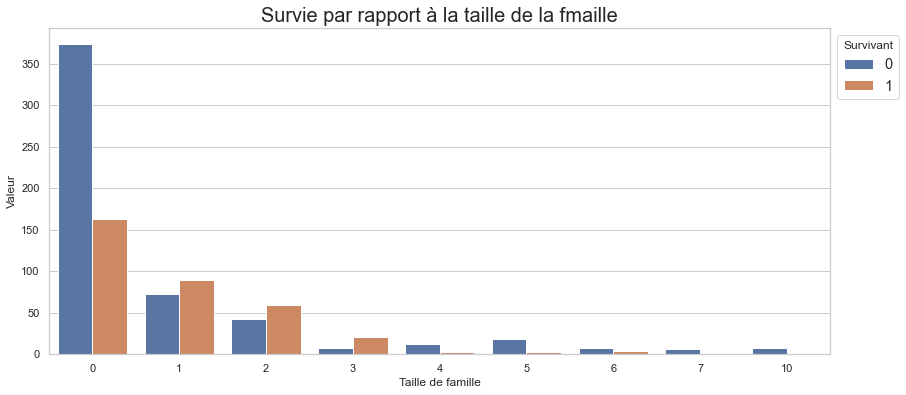

In [120]:
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")
sns.barplot(x=s.Family , y= s.value ,hue=s.Survived)
plt.title("Survie par rapport à la taille de la fmaille", fontsize=20)
plt.ylabel("Valeur")
plt.xlabel("Taille de famille")
plt.legend(title="Survivant", fontsize='large',
           title_fontsize="12", loc=2, bbox_to_anchor=(1, 1))
plt.show()

<span style="color:#DD9938">
On peut constater que le nombre de survivant est plus fort chez les personnes seules mais aussi parce qu'elles sont plus nombreuses
</br>
Les familles 1 2 3 ont un bon niveau de survivalité du peut être à l'entraide 
Puis dans le cas des famille nombreuse voire tres nombreuse ,on peut constater que cela les a probablement mener à la mort , le nombre dans ce cas c'est révélé être un hadicap ou le refus de laisser un individu du groupe sur le navire
</span>



<span style="color:#DD9938">le nombre de passagers qui ont une réservation $1^{ere}$ classe $2^{eme}$ classe et $3^{eme}$ classe</span>

In [121]:
df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
dtype: int64

In [122]:
df.value_counts("Pclass").plot.pie(labels=["1ere classe","2nde classe","3eme classe"],ylabel="",autopct="%.2f",figsize=(6, 6),title="Répartition classe")

<AxesSubplot:title={'center':'Répartition classe'}>

<AxesSubplot:>

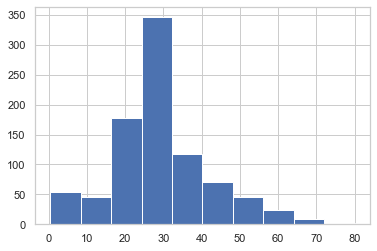

In [123]:
df['Age'].hist()

In [124]:
df.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489   
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.091566  0.159651  0.216225   
Family    0.016639  0.065997  0.200988 -0.248512  0.890712  0.783111   
seul     -0.203367  0.135207 -0.303646  0.179775 -0.584471 -0.583398   

              Fare    Family      seul  
Survived  0.257307  0.016639 -0.203367  
Pclass   -0.549500  0.065997  0.135207  
Sex       0.182333  0.200988 -0.303646  
Age       0.091566 -0.248512  0.179775  
SibSp     0.159651  0.890712 -0.584471  
Parch     0.216225  0.783111 -0.583398  
Fare      1.000000  0.217138 -0.271832  
Family    0.217138  1.000000 -0.690922  
seul     -0.271832 -0.690922  1.000000

In [125]:
heatmap(df.corr())

NameError: name 'heatmap' is not defined

<span><h2 style="color: rgb(20, 110, 228);font-weight:bolder;"> Partie 1 : Machine learning</h2></span>

In [126]:
plt.scatter(df["Survived"],df["Age"])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [127]:
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype('category')
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test['Age'] = test['Age'].fillna(test['Age'].mean())
test.head()

PassengerId  Pclass                                          Name Sex  \
0          892       3                              Kelly, Mr. James   0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)   1   
2          894       2                     Myles, Mr. Thomas Francis   0   
3          895       3                              Wirz, Mr. Albert   0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   1   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 33.3+ KB


In [128]:
X_test  = test.drop(["PassengerId","Name","Cabin","Embarked","Ticket"], axis=1).copy()

In [129]:
X_test.head()

Pclass Sex   Age  SibSp  Parch     Fare
0       3   0  34.5      0      0   7.8292
1       3   1  47.0      1      0   7.0000
2       2   0  62.0      0      0   9.6875
3       3   0  27.0      0      0   8.6625
4       3   1  22.0      1      1  12.2875

on drop le target de X_train: Survived

In [130]:
X_train = df.drop(["Survived","Categ_age","Family","seul"], axis=1)
Y_train = df["Survived"]
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [131]:
X_train

Pclass  Sex        Age  SibSp  Parch     Fare
0         3    0  22.000000      1      0   7.2500
1         1    1  38.000000      1      0  71.2833
2         3    1  26.000000      0      0   7.9250
3         1    1  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    0  27.000000      0      0  13.0000
887       1    1  19.000000      0      0  30.0000
888       3    1  29.699118      1      2  23.4500
889       1    0  26.000000      0      0  30.0000
890       3    0  32.000000      0      0   7.7500

[891 rows x 6 columns]

In [132]:
X_test

Pclass Sex       Age  SibSp  Parch      Fare
0         3   0  34.50000      0      0    7.8292
1         3   1  47.00000      1      0    7.0000
2         2   0  62.00000      0      0    9.6875
3         3   0  27.00000      0      0    8.6625
4         3   1  22.00000      1      1   12.2875
..      ...  ..       ...    ...    ...       ...
413       3   0  30.27259      0      0    8.0500
414       1   1  39.00000      0      0  108.9000
415       3   0  38.50000      0      0    7.2500
416       3   0  30.27259      0      0    8.0500
417       3   0  30.27259      1      1   22.3583

[418 rows x 6 columns]

In [133]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


79.8

In [134]:
# DecisionTree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [135]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [136]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1     Age     2.652088
2   SibSp    -0.038807
4    Fare    -0.101019
3   Parch    -0.338654
0     Sex    -1.048392